# 합성곱 신경망의 시각화


In [60]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 가중치 시각화


In [61]:
from tensorflow import keras

# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
# !wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

model = keras.models.load_model('best-cnn-model.h5')

# 모델 안의 레이어 확인
model.layers

In [62]:
# 첫번째 레이어 층의 가중치를 확인할 수 있다.
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


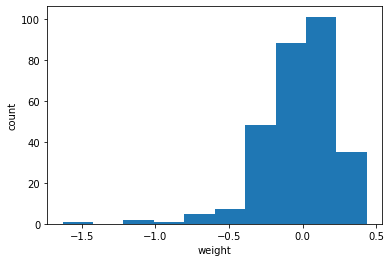

In [63]:
# 히스토그램으로 확인해보자
conv_weights = conv.weights[0].numpy()

import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()


## 학습을 하지 않았을 때의 히스토그램

(3, 3, 1, 32)
-0.0029798597 0.08092386


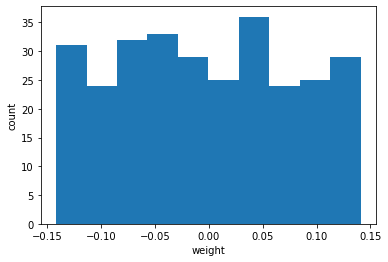

In [64]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 원래는 균등분포를 사용해서 초기화를 해놓는데, 학습을 통해서 위와 같이 가중치가 수정된 것이다.

## 층의 가중치를 시각화

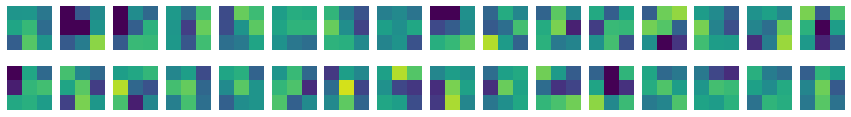

In [65]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

# 높은 값은 밝은색, 낮은 값은 어두운 색으로 나타낸다.
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()


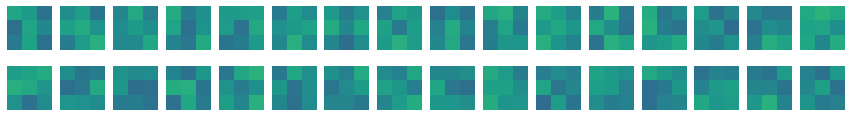

In [66]:
# 원래모양
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()


## 함수형 API, Functional API
층의 입력과 출력을 자유롭게 사용할 수 있게 하는 것

## 첫번째 Conv2D 가중치 확인

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")


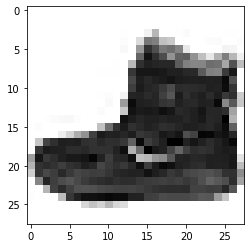

1/1 [==============================] - 0s 23ms/step
(1, 28, 28, 32)


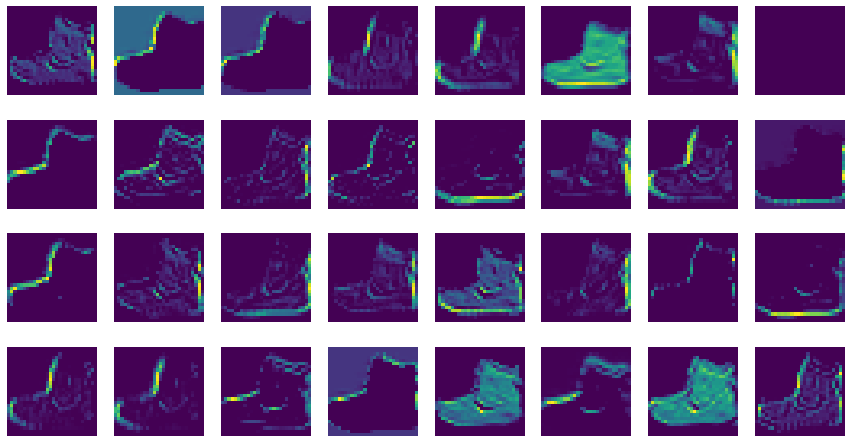

In [67]:
print(model.input)

conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()


## 두번째 Conv2D 가중치 확인

1/1 [==============================] - 0s 28ms/step
(1, 14, 14, 64)


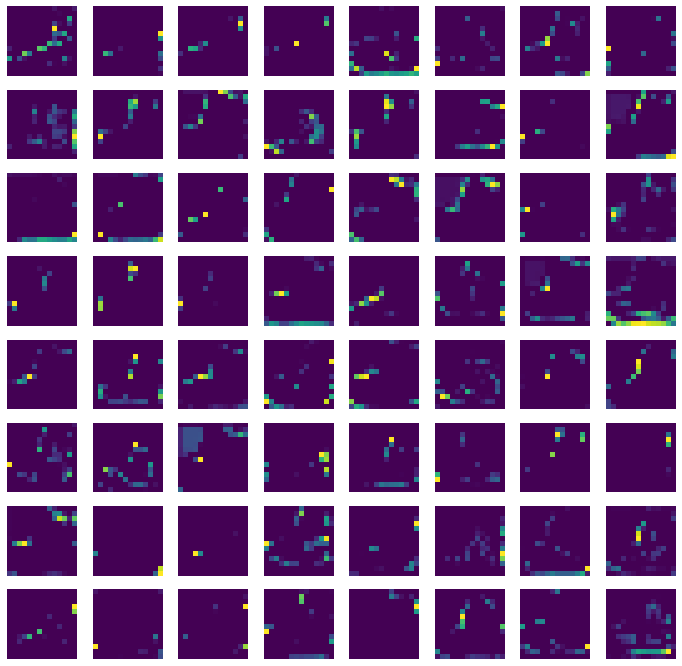

In [68]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

print(feature_maps.shape)

fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()